## Import

In [1]:
# importing the libraries
import os
import pandas as pd
import numpy as np
from itertools import chain
from IPython.display import clear_output

# for reading and displaying images
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt

# for creating validation set
from sklearn.model_selection import train_test_split

# PyTorch libraries and modules
import torch
import torch.nn as nn
import torch.nn.functional as F

# models
from src.models.model_util import load_model, save_checkpoint

# other files
from src.training.run import *
from src.data.data_util import *

# Torch
from torch.optim import *
import torch.optim as optim
from torchsummary import summary
# from tensorboardX import SummaryWriter

# Maintenance
import mlflow
from DeepNotion.build import *

# CAM - M3dCam
# from medcam import medcam

## Load Configurations and set Seed

In [2]:
from src.config import *
cfg = load_config()

random_seed = cfg.seed
np.random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)

## MLFlow Init

In [3]:
exp_name = '3dcnn_smri_comparison_test'
try:
    mlflow.create_experiment(name=exp_name)
except:
    print('Existing experiment')
    
mlflow.set_experiment(exp_name)

Existing experiment


## Tracking on Notion

In [4]:
cfg['notion']['use'] = False

### Load Preexisting page

In [6]:
if cfg['notion']['use']:
    root, client = login(cfg['notion'])
    page = root.children[-1]

### Make New Page

In [18]:
if cfg['notion']['use']:

    print(today())
    root, client = login(cfg['notion'])
    page = make_page(root)

    toggle = page.children.add_new(ToggleBlock, title='Configuration')

    print("Saving Configurations ...")
    for name, value in cfg.get_dict().items():
        if name not in ['notion']:
            txt = '**' + name + '** ' + str(value)
            print(txt)
            toggle.children.add_new(BulletedListBlock, title=txt)

#     fold_db = make_db(page, schema=cfg.schema)
#     test_db = make_db(page, schema=cfg.test_schema)

2021.02.08.20:14


## Train

### No Fold

In [5]:
cfg.model_name = 'vanilla_residual'
cfg.layers = [8, 16, 32, 64]
cfg.batch_size = 16
cfg.rot90 = True
cfg.refresh()
model, cfg.device = load_model(cfg.model_name, verbose=False, cfg=cfg)

cfg.registration = 'tlrc'
print(cfg.device)

optimizer = optim.Adam(model.parameters(), lr=cfg.learning_rate)

trn_dp, tst_dp = DataPacket(), DataPacket()

run_date = today().replace('.', '_').replace(':', '') + '_' + cfg.model_name
condition = 'TLRC Aug, 100 ep, VRes - 8/16/32/64, rot90'
mlflow.start_run(run_name=condition)

Model Vanilla_residual is selected.
cuda:0


<ActiveRun: >

Epoch 1 / 100, BEST MAE 8.000
[train] 159.6 sec [valid] 19.1 sec 
[TRAIN]:: Loss=2976.674 Mae=52.150 Rmse=54.414 Corr=0.175 
[TEST ]:: Loss=2515.477 Mae=47.466 Rmse=50.091 Corr=0.625 


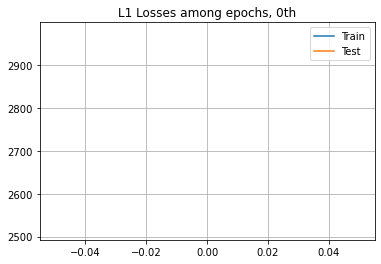

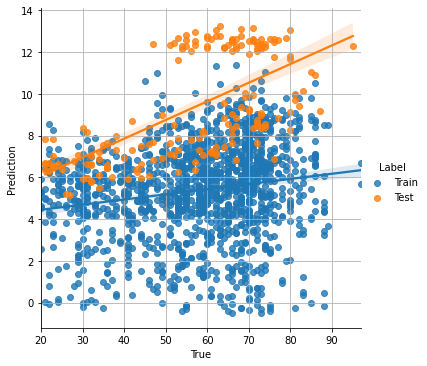

Saving ...
Epoch 2 / 100, BEST MAE 8.000
[train] 160.5 sec [valid] 18.3 sec 
[TRAIN]:: Loss=2409.433 Mae=46.673 Rmse=48.945 Corr=0.503 
[TEST ]:: Loss=1852.423 Mae=40.498 Rmse=42.976 Corr=0.733 
Epoch 3 / 100, BEST MAE 8.000
[train] 157.3 sec [valid] 18.4 sec 
[TRAIN]:: Loss=1966.075 Mae=42.008 Rmse=44.185 Corr=0.647 
[TEST ]:: Loss=1451.085 Mae=35.575 Rmse=38.012 Corr=0.832 
Epoch 4 / 100, BEST MAE 8.000
[train] 158.8 sec [valid] 18.4 sec 
[TRAIN]:: Loss=1580.113 Mae=37.531 Rmse=39.577 Corr=0.733 
[TEST ]:: Loss=1189.666 Mae=32.284 Rmse=34.407 Corr=0.855 
Epoch 5 / 100, BEST MAE 8.000
[train] 157.0 sec [valid] 18.5 sec 
[TRAIN]:: Loss=1250.200 Mae=33.192 Rmse=35.163 Corr=0.765 
[TEST ]:: Loss=1244.674 Mae=33.271 Rmse=35.208 Corr=0.856 
Epoch 6 / 100, BEST MAE 8.000
[train] 157.5 sec [valid] 18.4 sec 
[TRAIN]:: Loss=965.920 Mae=28.973 Rmse=30.858 Corr=0.802 
[TEST ]:: Loss=932.266 Mae=28.787 Rmse=30.464 Corr=0.867 


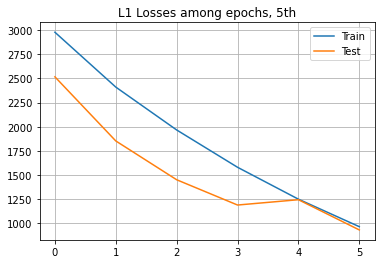

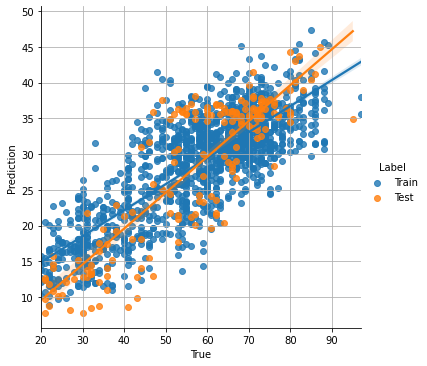

Saving ...
Epoch 7 / 100, BEST MAE 8.000
[train] 160.8 sec [valid] 18.4 sec 
[TRAIN]:: Loss=730.690 Mae=25.000 Rmse=26.786 Corr=0.834 
[TEST ]:: Loss=688.412 Mae=24.522 Rmse=26.166 Corr=0.861 
Epoch 8 / 100, BEST MAE 8.000
[train] 158.0 sec [valid] 18.8 sec 
[TRAIN]:: Loss=535.773 Mae=21.177 Rmse=22.857 Corr=0.861 
[TEST ]:: Loss=314.787 Mae=15.427 Rmse=17.658 Corr=0.844 
Epoch 9 / 100, BEST MAE 8.000
[train] 159.3 sec [valid] 18.6 sec 
Saving ...
[TRAIN]:: Loss=381.004 Mae=17.736 Rmse=19.184 Corr=0.891 
[TEST ]:: Loss=78.292 Mae=7.048 Rmse=8.683 Corr=0.867 
Epoch 10 / 100, BEST MAE 7.048
[train] 157.0 sec [valid] 18.5 sec 
[TRAIN]:: Loss=263.600 Mae=14.514 Rmse=15.845 Corr=0.903 
[TEST ]:: Loss=102.596 Mae=7.942 Rmse=9.939 Corr=0.869 
Epoch 11 / 100, BEST MAE 7.048
[train] 156.4 sec [valid] 18.6 sec 
[TRAIN]:: Loss=186.946 Mae=12.052 Rmse=13.249 Corr=0.910 
[TEST ]:: Loss=117.015 Mae=8.925 Rmse=10.703 Corr=0.863 


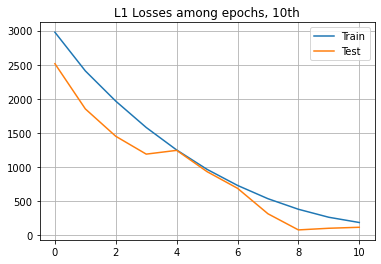

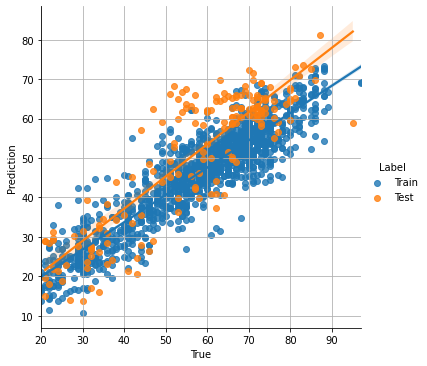

Saving ...
Epoch 12 / 100, BEST MAE 7.048
[train] 157.0 sec [valid] 18.5 sec 
[TRAIN]:: Loss=126.198 Mae=9.632 Rmse=10.779 Corr=0.918 
[TEST ]:: Loss=94.464 Mae=7.744 Rmse=9.583 Corr=0.867 
Epoch 13 / 100, BEST MAE 7.048
[train] 156.7 sec [valid] 18.5 sec 
[TRAIN]:: Loss=85.717 Mae=7.727 Rmse=8.778 Corr=0.931 
[TEST ]:: Loss=290.947 Mae=14.632 Rmse=16.950 Corr=0.887 
Epoch 14 / 100, BEST MAE 7.048
[train] 156.3 sec [valid] 18.5 sec 
[TRAIN]:: Loss=61.535 Mae=6.353 Rmse=7.434 Corr=0.930 
[TEST ]:: Loss=181.404 Mae=10.795 Rmse=13.362 Corr=0.849 
Epoch 15 / 100, BEST MAE 7.048
[train] 156.8 sec [valid] 19.0 sec 
[TRAIN]:: Loss=49.869 Mae=5.586 Rmse=6.720 Corr=0.930 
[TEST ]:: Loss=171.959 Mae=10.654 Rmse=12.902 Corr=0.865 
Epoch 16 / 100, BEST MAE 7.048
[train] 156.7 sec [valid] 18.5 sec 
[TRAIN]:: Loss=44.092 Mae=5.174 Rmse=6.341 Corr=0.925 
[TEST ]:: Loss=167.388 Mae=10.464 Rmse=12.750 Corr=0.864 


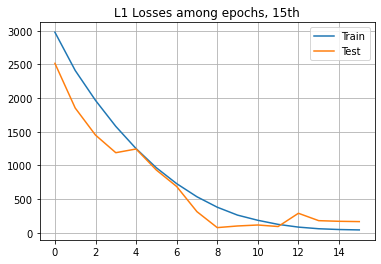

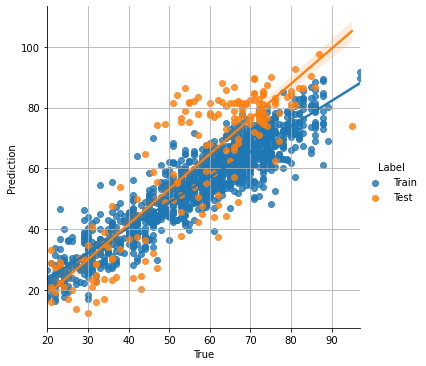

Saving ...
Epoch 17 / 100, BEST MAE 7.048
[train] 156.5 sec [valid] 18.7 sec 
[TRAIN]:: Loss=42.685 Mae=5.052 Rmse=6.236 Corr=0.922 
[TEST ]:: Loss=90.457 Mae=7.409 Rmse=9.309 Corr=0.865 
Epoch 18 / 100, BEST MAE 7.048
[train] 156.3 sec [valid] 18.6 sec 
[TRAIN]:: Loss=40.450 Mae=4.964 Rmse=6.119 Corr=0.925 
[TEST ]:: Loss=138.053 Mae=9.735 Rmse=11.649 Corr=0.874 
Epoch 19 / 100, BEST MAE 7.048
[train] 156.2 sec [valid] 19.8 sec 
[TRAIN]:: Loss=38.363 Mae=4.775 Rmse=5.940 Corr=0.927 
[TEST ]:: Loss=145.445 Mae=10.087 Rmse=11.974 Corr=0.869 
Epoch 20 / 100, BEST MAE 7.048
[train] 156.1 sec [valid] 18.6 sec 
[TRAIN]:: Loss=32.520 Mae=4.368 Rmse=5.456 Corr=0.937 
[TEST ]:: Loss=115.371 Mae=8.671 Rmse=10.645 Corr=0.878 
Epoch 21 / 100, BEST MAE 7.048
[train] 156.2 sec [valid] 18.5 sec 
[TRAIN]:: Loss=30.037 Mae=4.196 Rmse=5.189 Corr=0.942 
[TEST ]:: Loss=162.930 Mae=10.697 Rmse=12.693 Corr=0.861 


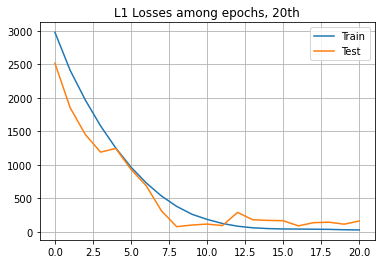

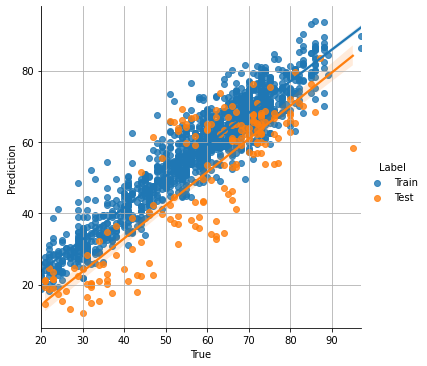

Saving ...
Epoch 22 / 100, BEST MAE 7.048
[train] 156.2 sec [valid] 18.5 sec 
Saving ...
[TRAIN]:: Loss=31.005 Mae=4.208 Rmse=5.258 Corr=0.940 
[TEST ]:: Loss=75.670 Mae=6.960 Rmse=8.584 Corr=0.885 
Epoch 23 / 100, BEST MAE 6.960
[train] 155.8 sec [valid] 18.4 sec 
[TRAIN]:: Loss=32.145 Mae=4.283 Rmse=5.353 Corr=0.938 
[TEST ]:: Loss=79.158 Mae=7.057 Rmse=8.752 Corr=0.882 
Epoch 24 / 100, BEST MAE 6.960
[train] 156.4 sec [valid] 18.5 sec 
[TRAIN]:: Loss=28.811 Mae=4.096 Rmse=5.072 Corr=0.944 
[TEST ]:: Loss=98.096 Mae=7.855 Rmse=9.771 Corr=0.877 
Epoch 25 / 100, BEST MAE 6.960
[train] 156.7 sec [valid] 18.6 sec 
Saving ...
[TRAIN]:: Loss=29.737 Mae=4.102 Rmse=5.167 Corr=0.943 
[TEST ]:: Loss=69.783 Mae=6.575 Rmse=8.207 Corr=0.882 
Epoch 26 / 100, BEST MAE 6.575
[train] 156.7 sec [valid] 18.8 sec 
[TRAIN]:: Loss=30.978 Mae=4.220 Rmse=5.280 Corr=0.940 
[TEST ]:: Loss=112.193 Mae=8.529 Rmse=10.456 Corr=0.876 


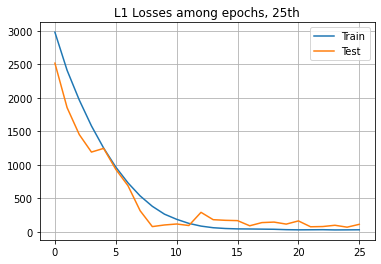

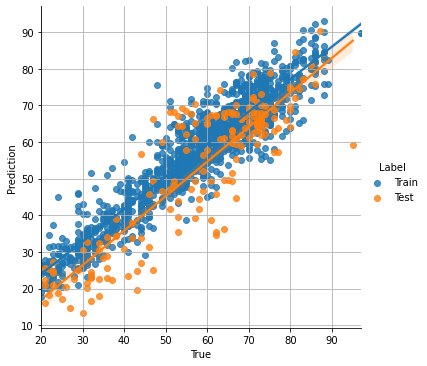

Saving ...
Epoch 27 / 100, BEST MAE 6.575
[train] 157.3 sec [valid] 18.7 sec 
[TRAIN]:: Loss=28.764 Mae=4.117 Rmse=5.064 Corr=0.944 
[TEST ]:: Loss=122.443 Mae=8.824 Rmse=10.840 Corr=0.880 
Epoch 28 / 100, BEST MAE 6.575
[train] 158.7 sec [valid] 19.4 sec 
[TRAIN]:: Loss=28.733 Mae=4.067 Rmse=5.042 Corr=0.945 
[TEST ]:: Loss=75.872 Mae=6.881 Rmse=8.506 Corr=0.881 
Epoch 29 / 100, BEST MAE 6.575
[train] 158.8 sec [valid] 18.6 sec 
[TRAIN]:: Loss=27.439 Mae=4.002 Rmse=4.934 Corr=0.947 
[TEST ]:: Loss=81.747 Mae=7.278 Rmse=8.847 Corr=0.876 
Epoch 30 / 100, BEST MAE 6.575
[train] 161.3 sec [valid] 19.3 sec 
[TRAIN]:: Loss=28.677 Mae=4.044 Rmse=5.049 Corr=0.944 
[TEST ]:: Loss=81.603 Mae=7.062 Rmse=8.810 Corr=0.879 
Epoch 31 / 100, BEST MAE 6.575
[train] 160.0 sec [valid] 18.7 sec 
[TRAIN]:: Loss=28.023 Mae=4.024 Rmse=4.982 Corr=0.946 
[TEST ]:: Loss=85.812 Mae=7.374 Rmse=9.080 Corr=0.885 


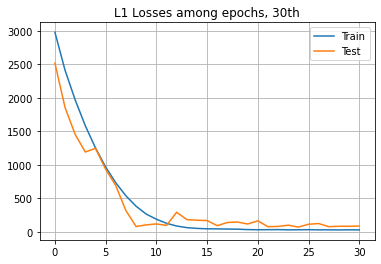

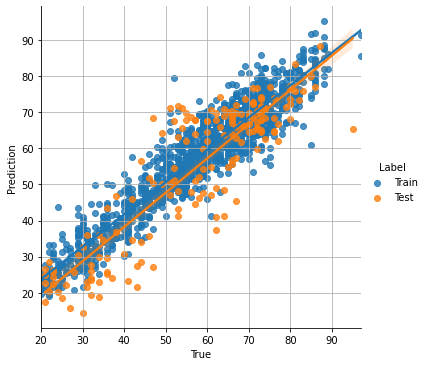

Saving ...
Epoch 32 / 100, BEST MAE 6.575
[train] 156.3 sec [valid] 18.9 sec 
[TRAIN]:: Loss=27.810 Mae=4.016 Rmse=4.986 Corr=0.946 
[TEST ]:: Loss=94.951 Mae=7.667 Rmse=9.564 Corr=0.889 
Epoch 33 / 100, BEST MAE 6.575
[train] 156.0 sec [valid] 18.5 sec 
[TRAIN]:: Loss=28.491 Mae=4.039 Rmse=5.054 Corr=0.945 
[TEST ]:: Loss=73.395 Mae=6.768 Rmse=8.428 Corr=0.887 
Epoch 34 / 100, BEST MAE 6.575
[train] 156.1 sec [valid] 18.6 sec 
[TRAIN]:: Loss=29.037 Mae=4.073 Rmse=5.111 Corr=0.944 
[TEST ]:: Loss=83.234 Mae=6.983 Rmse=8.911 Corr=0.890 
Epoch 35 / 100, BEST MAE 6.575
[train] 156.3 sec [valid] 18.6 sec 
[TRAIN]:: Loss=27.360 Mae=3.976 Rmse=4.937 Corr=0.948 
[TEST ]:: Loss=76.162 Mae=6.727 Rmse=8.558 Corr=0.889 
Epoch 36 / 100, BEST MAE 6.575
[train] 156.2 sec [valid] 18.6 sec 
[TRAIN]:: Loss=28.216 Mae=4.043 Rmse=5.021 Corr=0.945 
[TEST ]:: Loss=70.931 Mae=6.672 Rmse=8.258 Corr=0.889 


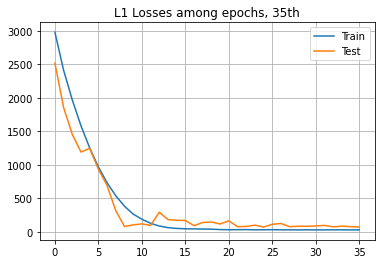

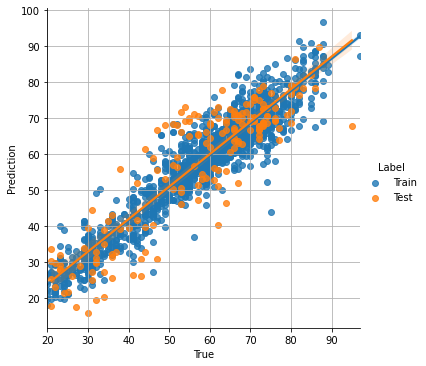

Saving ...
Epoch 37 / 100, BEST MAE 6.575
[train] 156.5 sec [valid] 18.6 sec 
[TRAIN]:: Loss=27.299 Mae=3.973 Rmse=4.944 Corr=0.947 
[TEST ]:: Loss=124.591 Mae=8.922 Rmse=11.020 Corr=0.874 
Epoch 38 / 100, BEST MAE 6.575
[train] 156.4 sec [valid] 18.6 sec 
[TRAIN]:: Loss=26.051 Mae=3.897 Rmse=4.814 Corr=0.950 
[TEST ]:: Loss=110.127 Mae=8.302 Rmse=10.365 Corr=0.863 
Epoch 39 / 100, BEST MAE 6.575
[train] 156.5 sec [valid] 18.7 sec 
[TRAIN]:: Loss=27.431 Mae=3.956 Rmse=4.950 Corr=0.947 
[TEST ]:: Loss=105.359 Mae=8.052 Rmse=10.125 Corr=0.870 
Epoch 40 / 100, BEST MAE 6.575
[train] 158.4 sec [valid] 18.6 sec 
[TRAIN]:: Loss=27.199 Mae=4.006 Rmse=4.973 Corr=0.947 
[TEST ]:: Loss=80.872 Mae=7.154 Rmse=8.797 Corr=0.879 
Epoch 41 / 100, BEST MAE 6.575
[train] 156.5 sec [valid] 18.7 sec 
[TRAIN]:: Loss=27.566 Mae=3.999 Rmse=5.012 Corr=0.947 
[TEST ]:: Loss=68.455 Mae=6.595 Rmse=8.084 Corr=0.892 


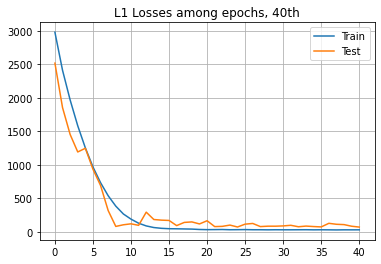

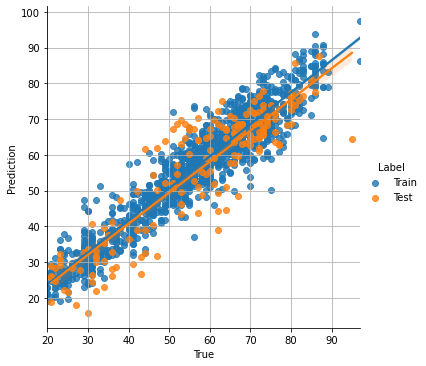

Saving ...
Epoch 42 / 100, BEST MAE 6.575
[train] 156.7 sec [valid] 18.7 sec 
[TRAIN]:: Loss=25.863 Mae=3.883 Rmse=4.808 Corr=0.950 
[TEST ]:: Loss=100.578 Mae=8.056 Rmse=9.893 Corr=0.863 
Epoch 43 / 100, BEST MAE 6.575
[train] 156.2 sec [valid] 18.9 sec 
[TRAIN]:: Loss=24.991 Mae=3.852 Rmse=4.762 Corr=0.952 
[TEST ]:: Loss=74.831 Mae=6.877 Rmse=8.464 Corr=0.882 
Epoch 44 / 100, BEST MAE 6.575
[train] 157.0 sec [valid] 18.7 sec 
[TRAIN]:: Loss=25.025 Mae=3.877 Rmse=4.798 Corr=0.952 
[TEST ]:: Loss=117.941 Mae=8.671 Rmse=10.732 Corr=0.866 
Epoch 45 / 100, BEST MAE 6.575
[train] 157.1 sec [valid] 19.1 sec 
[TRAIN]:: Loss=24.157 Mae=3.758 Rmse=4.666 Corr=0.953 
[TEST ]:: Loss=144.909 Mae=9.560 Rmse=11.910 Corr=0.854 
Epoch 46 / 100, BEST MAE 6.575
[train] 156.3 sec [valid] 18.7 sec 
[TRAIN]:: Loss=22.813 Mae=3.666 Rmse=4.501 Corr=0.956 
[TEST ]:: Loss=85.241 Mae=7.146 Rmse=8.954 Corr=0.879 


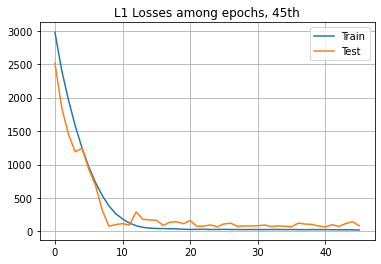

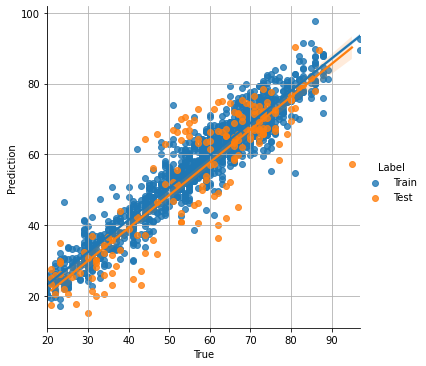

Saving ...
Epoch 47 / 100, BEST MAE 6.575
[train] 156.8 sec [valid] 18.6 sec 
[TRAIN]:: Loss=24.381 Mae=3.780 Rmse=4.697 Corr=0.953 
[TEST ]:: Loss=75.235 Mae=6.853 Rmse=8.413 Corr=0.880 
Epoch 48 / 100, BEST MAE 6.575
[train] 156.5 sec [valid] 18.7 sec 
[TRAIN]:: Loss=23.749 Mae=3.714 Rmse=4.630 Corr=0.954 
[TEST ]:: Loss=95.053 Mae=7.635 Rmse=9.563 Corr=0.853 
Epoch 49 / 100, BEST MAE 6.575
[train] 157.1 sec [valid] 18.6 sec 
[TRAIN]:: Loss=23.072 Mae=3.675 Rmse=4.578 Corr=0.955 
[TEST ]:: Loss=82.567 Mae=7.057 Rmse=8.917 Corr=0.871 
Epoch 50 / 100, BEST MAE 6.575
[train] 157.4 sec [valid] 19.6 sec 
[TRAIN]:: Loss=25.835 Mae=3.826 Rmse=4.856 Corr=0.951 
[TEST ]:: Loss=81.162 Mae=7.167 Rmse=8.815 Corr=0.866 
Epoch 51 / 100, BEST MAE 6.575
[train] 156.9 sec [valid] 18.7 sec 
[TRAIN]:: Loss=22.776 Mae=3.667 Rmse=4.544 Corr=0.956 
[TEST ]:: Loss=75.099 Mae=6.725 Rmse=8.442 Corr=0.872 


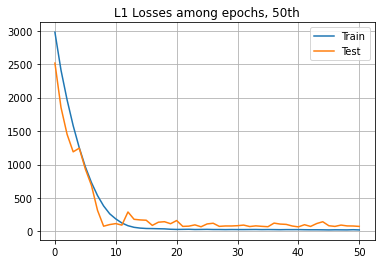

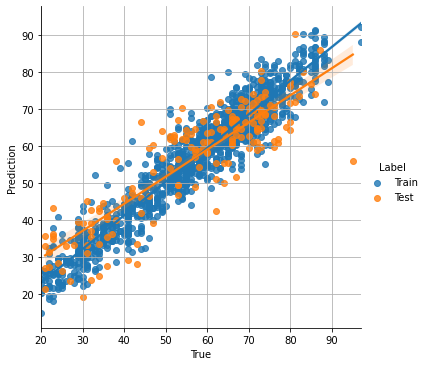

Saving ...
Epoch 52 / 100, BEST MAE 6.575
[train] 157.1 sec [valid] 18.6 sec 
Saving ...
[TRAIN]:: Loss=24.208 Mae=3.762 Rmse=4.664 Corr=0.954 
[TEST ]:: Loss=69.679 Mae=6.534 Rmse=8.108 Corr=0.885 
Epoch 53 / 100, BEST MAE 6.534
[train] 157.1 sec [valid] 18.6 sec 
[TRAIN]:: Loss=23.455 Mae=3.677 Rmse=4.589 Corr=0.955 
[TEST ]:: Loss=71.830 Mae=6.676 Rmse=8.219 Corr=0.881 
Epoch 54 / 100, BEST MAE 6.534
[train] 157.2 sec [valid] 18.6 sec 
[TRAIN]:: Loss=22.672 Mae=3.650 Rmse=4.523 Corr=0.956 
[TEST ]:: Loss=76.425 Mae=6.883 Rmse=8.481 Corr=0.876 
Epoch 55 / 100, BEST MAE 6.534
[train] 157.0 sec [valid] 18.8 sec 
[TRAIN]:: Loss=21.227 Mae=3.487 Rmse=4.350 Corr=0.959 
[TEST ]:: Loss=76.554 Mae=6.855 Rmse=8.465 Corr=0.880 
Epoch 56 / 100, BEST MAE 6.534
[train] 157.0 sec [valid] 18.7 sec 
[TRAIN]:: Loss=20.917 Mae=3.456 Rmse=4.328 Corr=0.960 
[TEST ]:: Loss=75.168 Mae=6.778 Rmse=8.488 Corr=0.873 


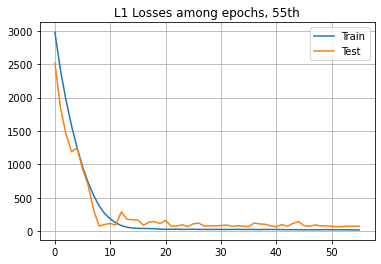

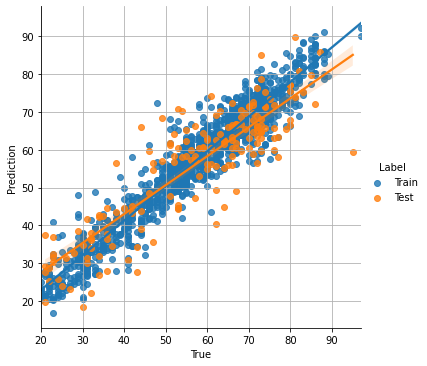

Saving ...
Epoch 57 / 100, BEST MAE 6.534
[train] 157.2 sec [valid] 18.7 sec 
[TRAIN]:: Loss=19.512 Mae=3.337 Rmse=4.199 Corr=0.963 
[TEST ]:: Loss=87.171 Mae=7.351 Rmse=9.135 Corr=0.875 
Epoch 58 / 100, BEST MAE 6.534
[train] 157.2 sec [valid] 18.8 sec 
[TRAIN]:: Loss=19.442 Mae=3.324 Rmse=4.199 Corr=0.963 
[TEST ]:: Loss=83.075 Mae=7.213 Rmse=8.929 Corr=0.886 
Epoch 59 / 100, BEST MAE 6.534
[train] 157.4 sec [valid] 18.8 sec 
[TRAIN]:: Loss=17.105 Mae=3.147 Rmse=3.925 Corr=0.967 
[TEST ]:: Loss=75.078 Mae=6.825 Rmse=8.431 Corr=0.873 
Epoch 60 / 100, BEST MAE 6.534
[train] 157.4 sec [valid] 19.1 sec 
[TRAIN]:: Loss=17.963 Mae=3.185 Rmse=4.026 Corr=0.966 
[TEST ]:: Loss=72.339 Mae=6.708 Rmse=8.265 Corr=0.877 
Epoch 61 / 100, BEST MAE 6.534
[train] 158.6 sec [valid] 18.8 sec 
[TRAIN]:: Loss=15.637 Mae=2.915 Rmse=3.746 Corr=0.970 
[TEST ]:: Loss=71.803 Mae=6.604 Rmse=8.239 Corr=0.879 


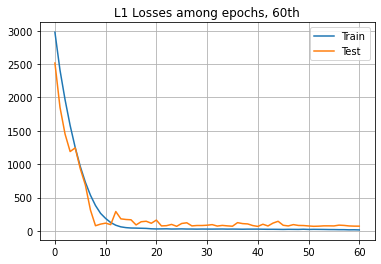

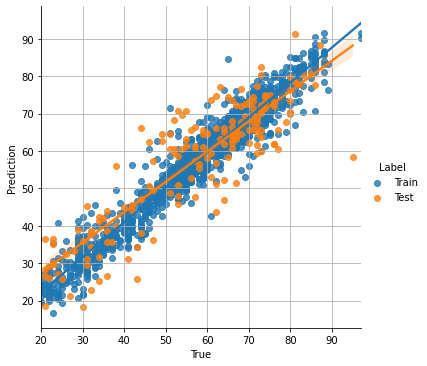

Saving ...
Epoch 62 / 100, BEST MAE 6.534
[train] 157.3 sec [valid] 18.8 sec 
[TRAIN]:: Loss=17.104 Mae=3.082 Rmse=3.928 Corr=0.967 
[TEST ]:: Loss=89.837 Mae=7.567 Rmse=9.329 Corr=0.862 
Epoch 63 / 100, BEST MAE 6.534
[train] 157.2 sec [valid] 18.7 sec 
[TRAIN]:: Loss=17.011 Mae=3.100 Rmse=3.959 Corr=0.967 
[TEST ]:: Loss=78.704 Mae=7.172 Rmse=8.689 Corr=0.875 
Epoch 64 / 100, BEST MAE 6.534
[train] 157.6 sec [valid] 18.9 sec 
[TRAIN]:: Loss=16.487 Mae=3.010 Rmse=3.864 Corr=0.968 
[TEST ]:: Loss=80.927 Mae=7.163 Rmse=8.765 Corr=0.878 
Epoch 65 / 100, BEST MAE 6.534
[train] 157.5 sec [valid] 18.8 sec 
[TRAIN]:: Loss=13.778 Mae=2.736 Rmse=3.516 Corr=0.974 
[TEST ]:: Loss=70.120 Mae=6.630 Rmse=8.145 Corr=0.884 
Epoch 66 / 100, BEST MAE 6.534
[train] 158.1 sec [valid] 18.7 sec 
[TRAIN]:: Loss=14.198 Mae=2.746 Rmse=3.612 Corr=0.973 
[TEST ]:: Loss=70.599 Mae=6.737 Rmse=8.215 Corr=0.882 


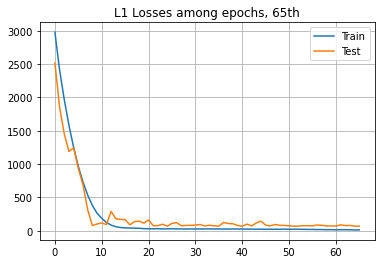

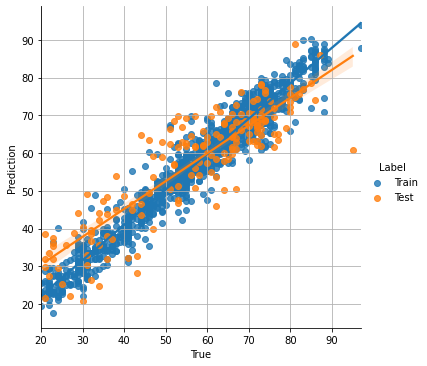

Saving ...
Epoch 67 / 100, BEST MAE 6.534
[train] 158.1 sec [valid] 18.7 sec 
[TRAIN]:: Loss=14.436 Mae=2.707 Rmse=3.609 Corr=0.972 
[TEST ]:: Loss=72.786 Mae=6.761 Rmse=8.309 Corr=0.882 
Epoch 68 / 100, BEST MAE 6.534
[train] 159.9 sec [valid] 19.0 sec 
[TRAIN]:: Loss=12.508 Mae=2.598 Rmse=3.396 Corr=0.976 
[TEST ]:: Loss=74.330 Mae=6.761 Rmse=8.431 Corr=0.875 
Epoch 69 / 100, BEST MAE 6.534
[train] 158.7 sec [valid] 18.7 sec 
[TRAIN]:: Loss=11.911 Mae=2.508 Rmse=3.306 Corr=0.977 
[TEST ]:: Loss=87.082 Mae=7.441 Rmse=9.118 Corr=0.877 
Epoch 70 / 100, BEST MAE 6.534
[train] 158.5 sec [valid] 18.8 sec 
[TRAIN]:: Loss=10.736 Mae=2.371 Rmse=3.132 Corr=0.980 
[TEST ]:: Loss=94.683 Mae=7.806 Rmse=9.557 Corr=0.878 
Epoch 71 / 100, BEST MAE 6.534
[train] 159.4 sec [valid] 20.9 sec 
[TRAIN]:: Loss=11.682 Mae=2.390 Rmse=3.244 Corr=0.978 
[TEST ]:: Loss=94.971 Mae=7.738 Rmse=9.551 Corr=0.881 


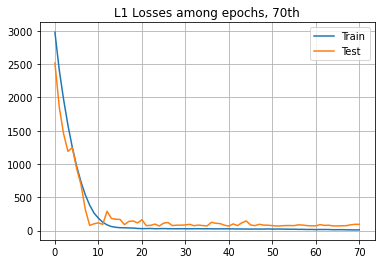

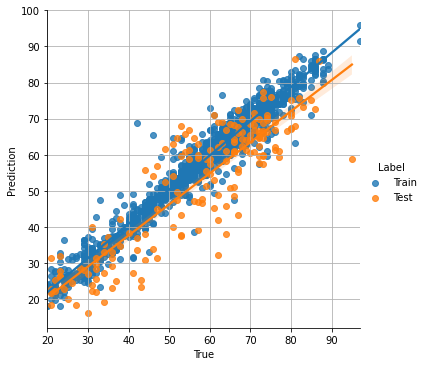

Saving ...
Epoch 72 / 100, BEST MAE 6.534
[train] 158.7 sec [valid] 18.8 sec 
[TRAIN]:: Loss=10.825 Mae=2.317 Rmse=3.127 Corr=0.979 
[TEST ]:: Loss=76.177 Mae=6.940 Rmse=8.522 Corr=0.883 
Epoch 73 / 100, BEST MAE 6.534
[train] 158.2 sec [valid] 18.8 sec 
[TRAIN]:: Loss=11.512 Mae=2.348 Rmse=3.231 Corr=0.978 
[TEST ]:: Loss=97.830 Mae=7.697 Rmse=9.657 Corr=0.876 
Epoch 74 / 100, BEST MAE 6.534
[train] 158.3 sec [valid] 18.7 sec 
[TRAIN]:: Loss=10.621 Mae=2.240 Rmse=3.099 Corr=0.980 
[TEST ]:: Loss=86.244 Mae=7.279 Rmse=9.045 Corr=0.879 
Epoch 75 / 100, BEST MAE 6.534
[train] 158.0 sec [valid] 18.9 sec 
[TRAIN]:: Loss=10.465 Mae=2.222 Rmse=3.040 Corr=0.980 
[TEST ]:: Loss=89.233 Mae=7.557 Rmse=9.269 Corr=0.883 
Epoch 76 / 100, BEST MAE 6.534
[train] 158.7 sec [valid] 18.7 sec 
[TRAIN]:: Loss=11.381 Mae=2.399 Rmse=3.212 Corr=0.978 
[TEST ]:: Loss=78.039 Mae=7.063 Rmse=8.635 Corr=0.884 


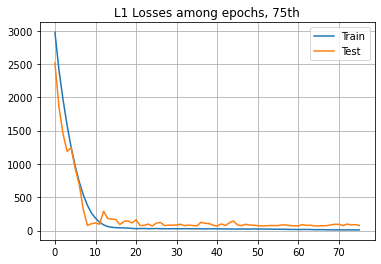

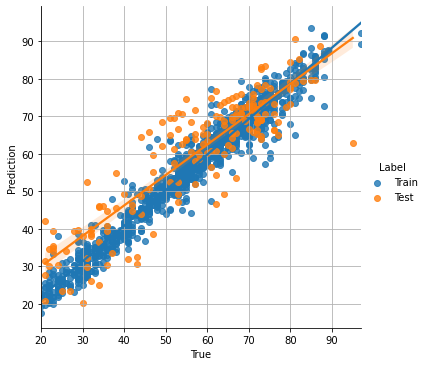

Saving ...
Epoch 77 / 100, BEST MAE 6.534
[train] 158.2 sec [valid] 18.8 sec 
[TRAIN]:: Loss=11.232 Mae=2.402 Rmse=3.220 Corr=0.979 
[TEST ]:: Loss=76.854 Mae=6.797 Rmse=8.523 Corr=0.888 
Epoch 78 / 100, BEST MAE 6.534
[train] 157.9 sec [valid] 18.8 sec 
[TRAIN]:: Loss=10.693 Mae=2.226 Rmse=3.100 Corr=0.980 
[TEST ]:: Loss=99.128 Mae=7.773 Rmse=9.732 Corr=0.884 
Epoch 79 / 100, BEST MAE 6.534
[train] 158.3 sec [valid] 18.8 sec 
[TRAIN]:: Loss=9.110 Mae=2.185 Rmse=2.897 Corr=0.983 
[TEST ]:: Loss=100.058 Mae=7.787 Rmse=9.784 Corr=0.879 
Epoch 80 / 100, BEST MAE 6.534
[train] 158.0 sec [valid] 18.7 sec 
[TRAIN]:: Loss=9.837 Mae=2.171 Rmse=2.982 Corr=0.981 
[TEST ]:: Loss=80.704 Mae=7.051 Rmse=8.725 Corr=0.883 
Epoch 81 / 100, BEST MAE 6.534
[train] 159.0 sec [valid] 19.0 sec 
[TRAIN]:: Loss=9.863 Mae=2.208 Rmse=3.014 Corr=0.981 
[TEST ]:: Loss=80.849 Mae=7.167 Rmse=8.791 Corr=0.872 


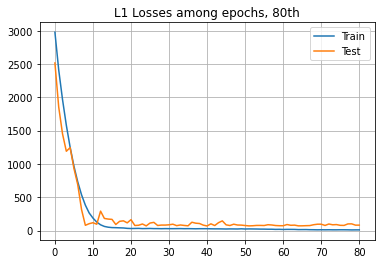

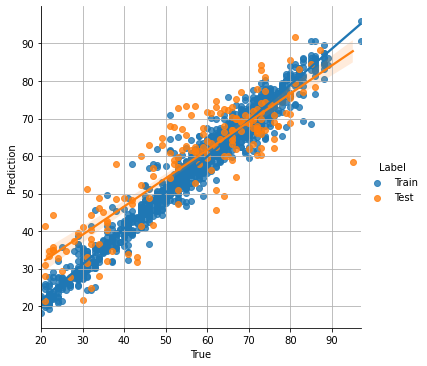

Saving ...
Epoch 82 / 100, BEST MAE 6.534
[train] 158.5 sec [valid] 18.8 sec 
[TRAIN]:: Loss=9.170 Mae=2.162 Rmse=2.896 Corr=0.983 
[TEST ]:: Loss=101.089 Mae=7.911 Rmse=9.836 Corr=0.870 
Epoch 83 / 100, BEST MAE 6.534
[train] 157.8 sec [valid] 19.1 sec 
[TRAIN]:: Loss=9.289 Mae=2.136 Rmse=2.904 Corr=0.982 
[TEST ]:: Loss=81.622 Mae=7.144 Rmse=8.794 Corr=0.883 
Epoch 84 / 100, BEST MAE 6.534
[train] 157.8 sec [valid] 18.7 sec 
[TRAIN]:: Loss=9.516 Mae=2.128 Rmse=2.911 Corr=0.982 
[TEST ]:: Loss=85.224 Mae=7.244 Rmse=8.988 Corr=0.882 
Epoch 85 / 100, BEST MAE 6.534
[train] 157.2 sec [valid] 18.7 sec 
[TRAIN]:: Loss=10.445 Mae=2.286 Rmse=3.098 Corr=0.980 
[TEST ]:: Loss=131.771 Mae=9.283 Rmse=11.312 Corr=0.871 
Epoch 86 / 100, BEST MAE 6.534
[train] 157.4 sec [valid] 18.7 sec 
[TRAIN]:: Loss=10.730 Mae=2.343 Rmse=3.131 Corr=0.980 
[TEST ]:: Loss=81.422 Mae=7.048 Rmse=8.790 Corr=0.881 


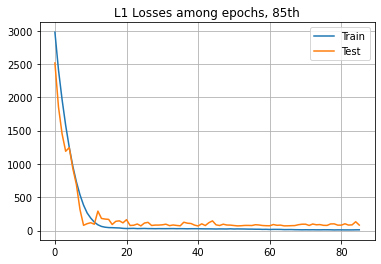

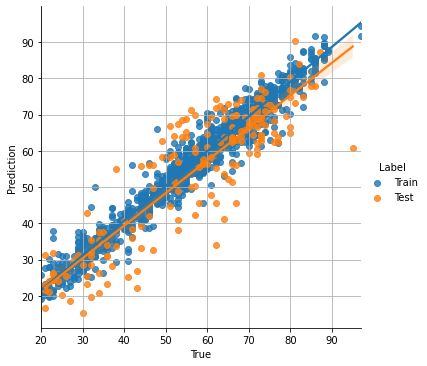

Saving ...
Epoch 87 / 100, BEST MAE 6.534
[train] 157.3 sec [valid] 18.7 sec 
[TRAIN]:: Loss=9.562 Mae=2.215 Rmse=2.968 Corr=0.982 
[TEST ]:: Loss=73.732 Mae=6.596 Rmse=8.333 Corr=0.878 
Epoch 88 / 100, BEST MAE 6.534
[train] 157.7 sec [valid] 18.8 sec 
[TRAIN]:: Loss=10.626 Mae=2.430 Rmse=3.133 Corr=0.980 
[TEST ]:: Loss=72.558 Mae=6.741 Rmse=8.300 Corr=0.878 
Epoch 89 / 100, BEST MAE 6.534
[train] 157.6 sec [valid] 18.8 sec 
[TRAIN]:: Loss=10.466 Mae=2.271 Rmse=3.084 Corr=0.980 
[TEST ]:: Loss=130.808 Mae=9.193 Rmse=11.264 Corr=0.871 
Epoch 90 / 100, BEST MAE 6.534
[train] 158.0 sec [valid] 18.8 sec 
[TRAIN]:: Loss=9.545 Mae=2.195 Rmse=2.935 Corr=0.982 
[TEST ]:: Loss=73.073 Mae=6.634 Rmse=8.314 Corr=0.884 
Epoch 91 / 100, BEST MAE 6.534
[train] 157.8 sec [valid] 18.6 sec 
[TRAIN]:: Loss=9.699 Mae=2.209 Rmse=2.928 Corr=0.982 
[TEST ]:: Loss=79.159 Mae=7.014 Rmse=8.658 Corr=0.880 


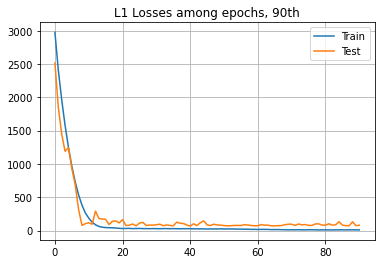

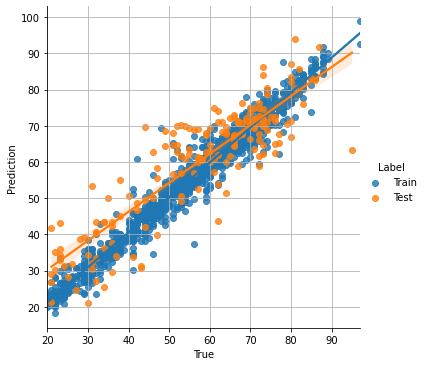

Saving ...
Epoch 92 / 100, BEST MAE 6.534
[train] 159.0 sec [valid] 18.8 sec 
[TRAIN]:: Loss=10.352 Mae=2.281 Rmse=3.079 Corr=0.980 
[TEST ]:: Loss=70.935 Mae=6.662 Rmse=8.228 Corr=0.889 
Epoch 93 / 100, BEST MAE 6.534
[train] 157.5 sec [valid] 18.7 sec 
[TRAIN]:: Loss=9.824 Mae=2.232 Rmse=2.984 Corr=0.981 
[TEST ]:: Loss=89.879 Mae=7.524 Rmse=9.293 Corr=0.879 
Epoch 94 / 100, BEST MAE 6.534
[train] 158.2 sec [valid] 18.7 sec 
[TRAIN]:: Loss=11.187 Mae=2.419 Rmse=3.228 Corr=0.979 
[TEST ]:: Loss=78.341 Mae=6.855 Rmse=8.612 Corr=0.880 
Epoch 95 / 100, BEST MAE 6.534
[train] 157.8 sec [valid] 18.6 sec 
[TRAIN]:: Loss=10.174 Mae=2.289 Rmse=3.047 Corr=0.981 
[TEST ]:: Loss=77.803 Mae=6.862 Rmse=8.581 Corr=0.882 
Epoch 96 / 100, BEST MAE 6.534
[train] 158.4 sec [valid] 18.8 sec 
Saving ...
[TRAIN]:: Loss=12.902 Mae=2.539 Rmse=3.401 Corr=0.976 
[TEST ]:: Loss=67.643 Mae=6.407 Rmse=7.977 Corr=0.889 


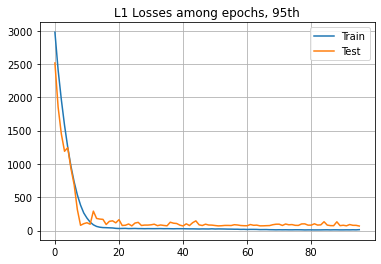

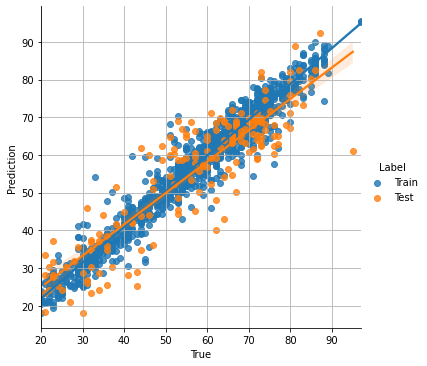

Saving ...
Epoch 97 / 100, BEST MAE 6.407
[train] 158.1 sec [valid] 18.8 sec 
[TRAIN]:: Loss=11.436 Mae=2.445 Rmse=3.237 Corr=0.978 
[TEST ]:: Loss=87.244 Mae=7.280 Rmse=9.165 Corr=0.884 
Epoch 98 / 100, BEST MAE 6.407
[train] 158.0 sec [valid] 18.8 sec 
[TRAIN]:: Loss=10.642 Mae=2.362 Rmse=3.167 Corr=0.980 
[TEST ]:: Loss=70.396 Mae=6.599 Rmse=8.156 Corr=0.888 
Epoch 99 / 100, BEST MAE 6.407
[train] 158.1 sec [valid] 18.9 sec 
[TRAIN]:: Loss=10.095 Mae=2.288 Rmse=3.051 Corr=0.981 
[TEST ]:: Loss=81.417 Mae=7.190 Rmse=8.808 Corr=0.888 
Epoch 100 / 100, BEST MAE 6.407
[train] 159.6 sec [valid] 18.7 sec 
[TRAIN]:: Loss=10.341 Mae=2.393 Rmse=3.073 Corr=0.980 
[TEST ]:: Loss=69.426 Mae=6.586 Rmse=8.147 Corr=0.887 
Saving ...


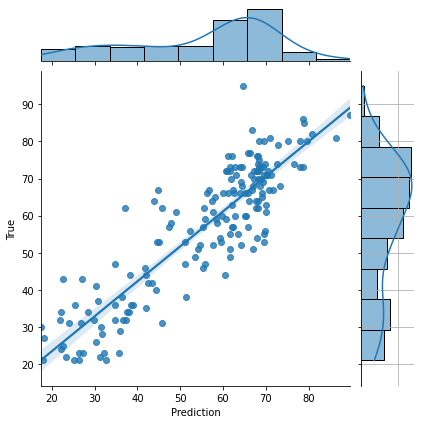

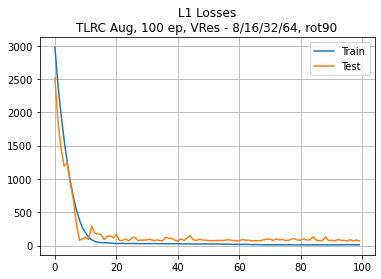

In [6]:
fold = None
# cfg.epochs = 200
db = make_db(page, client=client, schema=cfg['notion']['no_fold_aug_schema'], title='Results') if cfg['notion']['use'] else None
for e in range(cfg.epochs):
    
    start_time = time.time()
    print(f'Epoch {e+1} / {cfg.epochs}, BEST MAE {cfg.best_mae:.3f}')
    
    model, trn_dp, trn_res = train(model, optimizer, fn_lst, trn_dp, cfg, fold=fold, augment=True)
    model, tst_dp, tst_res = valid(model, fn_lst, tst_dp, cfg, fold=fold)
    elapsed_time = round(time.time() - start_time, 3)
       
    if cfg.best_mae > tst_dp.mae[-1]:
        
        cfg.best_mae = tst_dp.mae[-1]
        model_name = f'{cfg.model_name}_ep{e}-{cfg.epochs}_sd{cfg.seed}_mae{cfg.best_mae:.3f}.pth'
        save_checkpoint(model.state_dict(), model_name, model_dir=f'./result/models/{run_date}/', is_best=True)
        
    df = pd.concat([make_df(trn_res, 'Train'),
                    make_df(tst_res, 'Test')], ignore_index=True)
    
    trn_dp.corr.update(df[df['Label'] == 'Train'].corr().Prediction['True'])
    trn_dp.refresh()
    tst_dp.corr.update(df[df['Label'] == 'Test'].corr().Prediction['True'])
    tst_dp.refresh()

    if e % 1 == 0:
        trn_dp.info('train')
        tst_dp.info('test ')

    if e % cfg.verbose_period == 0:
        plt.title(f"L1 Losses among epochs, {e}th")
        plt.plot(list(trn_dp.loss), label='Train')
        plt.plot(list(tst_dp.loss), label='Test')
        plt.grid(); plt.legend()

        sns.lmplot(data=df, x='True', y='Prediction', hue='Label')
        plt.grid()
        plt.show()
        
        model_name = f'{cfg.model_name}_ep{e}-{str(cfg.epochs).zfill(3)}_sd{cfg.seed}_mae{cfg.best_mae:.3f}.pth'
        save_checkpoint(model.state_dict(), model_name, model_dir=f'./result/models/{run_date}/', is_best=False)
        
        if db:
            data = gather_data(e=e, time=elapsed_time, cfg=cfg,
                               train=trn_dp, valid=tst_dp)
            write_db(db, data)
    
    metrics = mlflow_data(time=elapsed_time, train=trn_dp, valid=tst_dp)
    mlflow.log_metrics(metrics, e)
    
    torch.cuda.empty_cache()
    
# Save Parameters to MLFlow
cfg.best_mae = min(tst_dp.mae)
cfg.refresh()
params = dict()
for name, value in cfg.get_dict().items():
    if name not in ['notion']:  
        params[name] = str(value)
mlflow.log_params(params)

save_checkpoint(cfg.get_dict(), 'cfg.pt', model_dir=f'./result/models/{run_date}/', is_best=True)

# Save Plots to MLFlow
sns.jointplot(data=df[df['Label'] == 'Test'], x='Prediction', y='True', kind='reg')
plt.grid()
plt.savefig(f'./result/models/{run_date}/test_jointplot.png')
plt.show()
# mlflow.log_artifact(f'./result/models/{run_date}/test_jointplot.png')
plt.close()

plt.title(f"L1 Losses\n{condition}")
plt.plot(list(trn_dp.loss), label='Train')
plt.plot(list(tst_dp.loss), label='Test')
plt.grid(); plt.legend()
plt.savefig(f'./result/models/{run_date}/loss_plot.png')
plt.show()
# mlflow.log_artifact(f'./result/models/{run_date}/loss_plot.png')

mlflow.end_run()

In [ ]:
import yaml
cfg.best_mae = min(tst_dp.mae)
with open(f'./result/models/{run_date}/cfg.yml', 'w') as y:
    yaml.dump(cfg.get_dict(), y, default_flow_style=False)

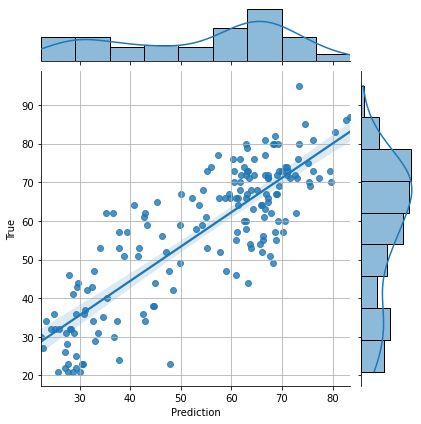

In [6]:
sns.jointplot(data=df[df['Label'] == 'Test'], x='Prediction', y='True', kind='reg')
plt.grid()

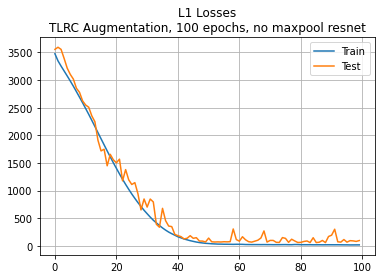

In [8]:
plt.title(f"L1 Losses\n{condition}")
plt.plot(list(trn_dp.loss), label='Train')
plt.plot(list(tst_dp.loss), label='Test')
plt.grid(); plt.legend()
plt.savefig(f'./result/models/{run_date}/loss_plot.png')
plt.show()
mlflow.log_artifact(f'./result/models/{run_date}/loss_plot.png')

### Unexpected stops - checkpoint

Epoch 91 / 100, BEST MAE 6.499
[train] 191.1 sec [valid] 21.0 sec 
[TRAIN]:: Loss=5.907 Mae=1.783 Rmse=2.289 Corr=0.989 
[TEST ]:: Loss=69.431 Mae=6.616 Rmse=8.106 Corr=0.883 


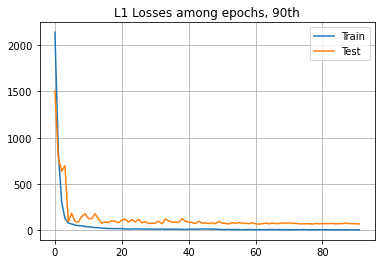

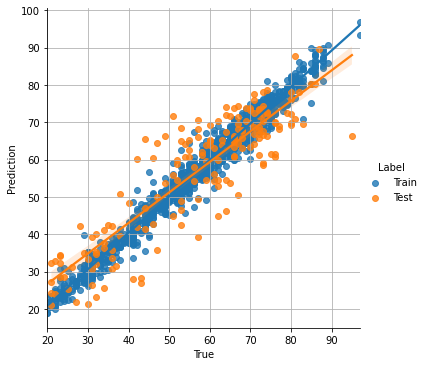

Saving ...


OSError: [WinError 433] A device which does not exist was specified: './result'

In [15]:
fold = None
# cfg.epochs = 200
db = make_db(page, client=client, schema=cfg['notion']['no_fold_aug_schema'], title='Results') if cfg['notion']['use'] else None
for e in range(e, cfg.epochs):
    
    start_time = time.time()
    print(f'Epoch {e+1} / {cfg.epochs}, BEST MAE {cfg.best_mae:.3f}')
    
    model, trn_dp, trn_res = train(model, optimizer, fn_lst, trn_dp, cfg, fold=fold, augment=True)
    model, tst_dp, tst_res = valid(model, fn_lst, tst_dp, cfg, fold=fold)
    elapsed_time = round(time.time() - start_time, 3)
       
    if cfg.best_mae > tst_dp.mae[-1]:
        
        cfg.best_mae = tst_dp.mae[-1]
        model_name = f'{cfg.model_name}_ep{e}-{cfg.epochs}_sd{cfg.seed}_mae{cfg.best_mae:.3f}.pth'
        save_checkpoint(model.state_dict(), model_name, model_dir=f'./result/models/{run_date}/', is_best=True)
        
    df = pd.concat([make_df(trn_res, 'Train'),
                    make_df(tst_res, 'Test')], ignore_index=True)
    
    trn_dp.corr.update(df[df['Label'] == 'Train'].corr().Prediction['True'])
    trn_dp.refresh()
    tst_dp.corr.update(df[df['Label'] == 'Test'].corr().Prediction['True'])
    tst_dp.refresh()

    if e % 1 == 0:
        trn_dp.info('train')
        tst_dp.info('test ')

    if e % cfg.verbose_period == 0:
        plt.title(f"L1 Losses among epochs, {e}th")
        plt.plot(list(trn_dp.loss), label='Train')
        plt.plot(list(tst_dp.loss), label='Test')
        plt.grid(); plt.legend()

        sns.lmplot(data=df, x='True', y='Prediction', hue='Label')
        plt.grid()
        plt.show()
        
        model_name = f'{cfg.model_name}_ep{e}-{str(cfg.epochs).zfill(3)}_sd{cfg.seed}_mae{cfg.best_mae:.3f}.pth'
        save_checkpoint(model.state_dict(), model_name, model_dir=f'./result/models/{run_date}/', is_best=False)
        
        if db:
            data = gather_data(e=e, time=elapsed_time, cfg=cfg,
                               train=trn_dp, valid=tst_dp)
            write_db(db, data)
    
    metrics = mlflow_data(time=elapsed_time, train=trn_dp, valid=tst_dp)
    mlflow.log_metrics(metrics, e)
    
    torch.cuda.empty_cache()
    
# Save Parameters to MLFlow
cfg.best_mae = min(tst_dp.mae)
cfg.refresh()
params = dict()
for name, value in cfg.get_dict().items():
    if name not in ['notion']:  
        params[name] = str(value)
mlflow.log_params(params)

save_checkpoint(cfg.get_dict(), 'cfg.pt', model_dir=f'./result/models/{run_date}/', is_best=True)

# Save Plots to MLFlow
sns.jointplot(data=df[df['Label'] == 'Test'], x='Prediction', y='True', kind='reg')
plt.grid()
plt.savefig(f'./result/models/{run_date}/test_jointplot.png')
plt.show()
# mlflow.log_artifact(f'./result/models/{run_date}/test_jointplot.png')
plt.close()

plt.title(f"L1 Losses\n{condition}")
plt.plot(list(trn_dp.loss), label='Train')
plt.plot(list(tst_dp.loss), label='Test')
plt.grid(); plt.legend()
plt.savefig(f'./result/models/{run_date}/loss_plot.png')
plt.show()
# mlflow.log_artifact(f'./result/models/{run_date}/loss_plot.png')

mlflow.end_run()

### kFold

In [8]:
models  = []
packets = []
tst_dp = DataPacket()

#### Whole Run

In [9]:
# test_db = make_db(page, client=client, schema=cfg['notion']['test_schema'], title='Test') if cfg['notion']['use'] else None
test_db = page.children[2]
fold_db = make_db(page, client=client, schema=cfg['notion']['schema'], title=f'Fold {fold+1}') if cfg['notion']['use'] else None

In [ ]:
for fold in range(16, cfg.folds):
    
    print(f'Fold {fold+1} / {cfg.folds}')
    mlflow.start_run(run_name=f'{today()} Fold {fold+1}')
    mlflow.log_params(params)
    mlflow.set_tags({
        'fold': fold+1
    })

    model, dps, res = run(cfg, fold, fold_db, mlflow=mlflow)
    models.append(model)
    packets.append(dps)
    
    cfg.test = True
    model, tst_dp, tst_res = eval(model, fn_lst, tst_dp, cfg, fold=None)
    
    df = pd.concat([make_df(res[0], 'Train'),
                   make_df(res[1], 'Valid'),
                   make_df(tst_res, 'Test')], ignore_index=True)
    
    tst_dp.corr.update(df[df['Label'] == 'Test'].corr().Prediction['True'])
    tst_dp.refresh()
    
    # Show Holdout testset information
    tst_dp.info('Holdout test')
    sns.lmplot(data=df, x='True', y='Prediction', hue='Label')
    plt.grid()
    plt.show()
    
    if test_db:
        data = gather_data(f=fold, test=tst_dp)
        write_db(test_db, data)
    
    torch.cuda.empty_cache()
    clear_output(wait=True)

## Ensemble

### Naive Averaging

In [39]:
# Ensemble
preds = dict()
models = glob('./models/ensembles/*.pth')
for fold, state in enumerate(models):
    
    model, device = load_model('resnet', verbose=False)
    model = torch.load(state)
    
    model, (_, _, _), tst_preds = eval(model, True, None, None, resize, device, batch_size,
                                      loss_fn, mae_fn, rmse_fn,
                                      [], [], [])
    
    preds[f'model_{fold}'] = list(map(float, tst_preds[1]))
    
ensemble_results = pd.DataFrame(preds)
ensemble_results['Avg'] = ensemble_results.mean(axis=1)
ensemble_results['True'] = list(map(float, tst_preds[0]))

Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.


In [64]:
def result_plot(df):
    
    avg = torch.Tensor(ensemble_results['Avg'])
    tru = torch.Tensor(ensemble_results['True'])
    
    corr = ensemble_results.corr()['True']['Avg']
    mae_fn, rmse_fn = nn.L1Loss(), RMSELoss()
    
    print(f'Ensemble Results')
    print(f'MAE  = {float(mae_fn(avg, tru)):.3f}')
    print(f'RMSE = {float(rmse_fn(avg, tru)):.3f}')
    print(f'CORR = {corr:.3f}')
    
    sns.lmplot(data=ensemble_results, x='True', y='Avg')
    plt.grid()
    plt.show()

Ensemble Results
MAE  = 7.025
RMSE = 8.598
CORR = 0.854


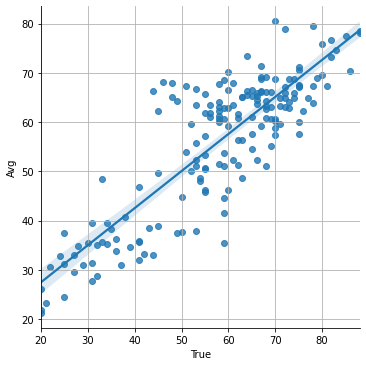

In [65]:
result_plot(ensemble_results)

### Blender

In [7]:
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()
        
    def forward(self, x):
        return x

In [8]:
class CFG:
    
    model_name='resnet'
    dropout=0.1
    use_last_layer=True

In [10]:
class Ensemble(nn.Module):
    
    def __init__(self, model_list, CFG):
        super(Ensemble, self).__init__()
        
        self.cfg = CFG
        self.dropout = self.cfg.dropout
        self.models = dict()
        
        for idx, model_path in enumerate(model_list):
            
            model, device = load_model(self.cfg.model_name, verbose=False)
            model = torch.load(model_path)
            if not self.cfg.use_last_layer:
                model.fc = Identity()
                
                self.last_layer = nn.Sequential(
                    nn.Linear(len(model_list) * 128, 128),
                    nn.Dropout(self.dropout),
                    nn.Linear(128, 1)
#                     nn.Dropout(self.dropout)
                )
                
            else:
                self.last_layer = nn.Sequential(
                    nn.Linear(len(model_list), 1),
#                     nn.Dropout(self.dropout)
                )
                
            for param in model.parameters():
                param.requires_grad = False
                
            self.models[idx] = model
        
    def forward(self, x):
        
        vectors = list()
        for idx, model in self.models.items():
            vectors.append(model(x))
            
        x = torch.cat(vectors, dim=1)
        x = self.last_layer(x)
        
        return x

In [11]:
model_list = glob('./models/ensembles/rough/*.pth')
model_list.sort()
cfg = CFG()
cfg.use_last_layer = True
model = Ensemble(model_list, cfg).to(device)
with torch.no_grad():
    model.last_layer[0].weight.fill_(1 / len(model_list))
optimizer = optim.Adam(model.parameters(), lr=1e-4)

Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.


## SFCN Test

In [53]:
resnet, _ = load_model('resnet', verbose=True)

Model Resnet is selected.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 16, 96, 48, 48]           2,352
       BatchNorm3d-2       [-1, 16, 96, 48, 48]              32
              ReLU-3       [-1, 16, 96, 48, 48]               0
         MaxPool3d-4       [-1, 16, 48, 24, 24]               0
            Conv3d-5       [-1, 16, 48, 24, 24]           6,912
       BatchNorm3d-6       [-1, 16, 48, 24, 24]              32
              ReLU-7       [-1, 16, 48, 24, 24]               0
            Conv3d-8       [-1, 16, 48, 24, 24]           6,912
       BatchNorm3d-9       [-1, 16, 48, 24, 24]              32
             ReLU-10       [-1, 16, 48, 24, 24]               0
       BasicBlock-11       [-1, 16, 48, 24, 24]               0
           Conv3d-12       [-1, 32, 24, 12, 12]          13,824
      BatchNorm3d-13       [-1, 32, 24, 12, 12]              64
             

In [119]:
cfg.model_name = 'sfcn'
model, cfg.device = load_model(cfg.model_name, verbose=False)
optimizer = optim.Adam(model.parameters(), lr=cfg.learning_rate)

Model Sfcn is selected.


In [120]:
state_dict = torch.load('../UKBiobank_deep_pretrain/brain_age/run_20190719_00_epoch_best_mae.p')
state_dict = dict(state_dict)
keys = list(map(lambda x: x.split('module.')[-1], state_dict.keys()))
state_dict = {k: v for k, v in zip(keys, state_dict.values())}
model.load_state_dict(state_dict)

<All keys matched successfully>

In [52]:
summary(model, input_size=(1, 160, 192, 160))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1    [-1, 32, 160, 192, 160]             896
       BatchNorm3d-2    [-1, 32, 160, 192, 160]              64
         MaxPool3d-3       [-1, 32, 80, 96, 80]               0
              ReLU-4       [-1, 32, 80, 96, 80]               0
            Conv3d-5       [-1, 64, 80, 96, 80]          55,360
       BatchNorm3d-6       [-1, 64, 80, 96, 80]             128
         MaxPool3d-7       [-1, 64, 40, 48, 40]               0
              ReLU-8       [-1, 64, 40, 48, 40]               0
            Conv3d-9      [-1, 128, 40, 48, 40]         221,312
      BatchNorm3d-10      [-1, 128, 40, 48, 40]             256
        MaxPool3d-11      [-1, 128, 20, 24, 20]               0
             ReLU-12      [-1, 128, 20, 24, 20]               0
           Conv3d-13      [-1, 256, 20, 24, 20]         884,992
      BatchNorm3d-14      [-1, 256, 20,

In [122]:
cfg.test = True
test_dset = MyDataset(cfg, augment=False, fold=None)
test_dl = DataLoader(test_dset, batch_size=16)

In [123]:
from tqdm import tqdm

In [124]:
mae = nn.L1Loss()

In [125]:
len(test_dl)

175

In [141]:
model.to(cfg.device)
model.eval()
y_preds, ys = [], []
age_bins = torch.tensor([42+i for i in range(40)])
with torch.no_grad(): # to not give loads on GPU... :(
    for i, (x, y) in tqdm(enumerate(test_dl)):

        x, y = F.interpolate(x, size=(160, 192, 160)).to(cfg.device), y.to(cfg.device)

        y_pred = model.forward(x)[0].to(cfg.device)
        y_pred = (np.exp(y_pred.squeeze().cpu()) * age_bins).sum()
#         y_pred = y_pred.max(axis=1).indices.squeeze()
#         y_pred += 42
        y_preds.append(y_pred)
        ys.append(y.squeeze())
#             loss = mae(y_pred, y.squeeze())


torch.cuda.empty_cache()

175it [01:34,  1.85it/s]
